<img src='images/gdd-logo.png' width='300px' align='right' style="padding: 15px">

# Pandas

Let's start exploring datasets. For this we are going to use the `pandas` library.

In this section we will cover:

- [Importing the library](#import)
- [Exploratory analysis](#exploratory)
- [Data Cleaning](#cleaning)
- [Plotting with `matplotlib`](#plotting)

<a id='import'></a>

## Importing

Pandas is a specialised package that allows us to work with databases using python.

First we need to import the package.

In [1]:
import pandas as pd

<a id='exploratory'></a>

## Exploratory analysis

The dataset  we'll be using is a Google Trends dataset on programming languages from 2004 to 2020.

It was downloaded as a CSV from [this Google Trends query](https://trends.google.com/trends/explore?date=2004-01-01%202020-12-31&q=%2Fm%2F05z1_,%2Fm%2F075st,%2Fm%2F0212jm,%2Fm%2F02p97,%2Fm%2F080_2).

<img src='images/what-i-think-i-do.png' width='600px' align='left'>

filepath: `data/programming-trends.csv`

This is a time series indexed by month with the search interest for each browser.

- **Month:** Each month from 2004-01 to 2020-12
- **Python:** Search interest for 
- **SQL:** Search interest for Python
- **R:** Search interest for R
- **JavaScript:** Search interest for JavaScript
- **Visual Basic for Applications:** Search interest for VBA

|Google defines the values of search interest as:|
|:---|
|Numbers represent search interest relative to the highest point on the chart for the given region and time. A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. A score of 0 means there was not enough data for this term.|

In [2]:
# Create data to use
trends = pd.read_csv('data/programming-trends.csv')

In [23]:
# look at the top 5 rows


,Month,Python,SQL,R,JavaScript,Visual Basic for Applications
0,2004-01-01,14,84,6,88,14
1,2004-02-01,14,94,6,95,16
2,2004-03-01,15,93,<5,89,15
3,2004-04-01,14,96,7,90,15
4,2004-05-01,12,91,6,87,14


In [24]:
# fetch column names


Index(['Month', 'Python', 'SQL', 'R', 'JavaScript',
       'Visual Basic for Applications'],
      dtype='object')

In [25]:
# get info on all the columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Month                          204 non-null    object
 1   Python                         204 non-null    int64 
 2   SQL                            204 non-null    int64 
 3   R                              204 non-null    object
 4   JavaScript                     204 non-null    int64 
 5   Visual Basic for Applications  204 non-null    object
dtypes: int64(3), object(3)
memory usage: 9.7+ KB


In [26]:
# get stats on the numeric columns - where's R and VBA?


,Python,SQL,JavaScript
count,204.000000,204.000000,204.000000
mean,19.725490,45.955882,41.132353
std,10.268472,20.952515,16.065970
min,11.000000,17.000000,22.000000
25%,13.000000,29.000000,31.000000
50%,14.000000,36.500000,33.000000
75%,24.250000,61.250000,48.250000
max,46.000000,100.000000,95.000000


In [28]:
# check the data types of each column


Month                            object
Python                            int64
SQL                               int64
R                                object
JavaScript                        int64
Visual Basic for Applications    object
dtype: object

In [29]:
# find the min and max of the data


Month                            2004-01-01
Python                                   11
SQL                                      17
R                                        10
JavaScript                               22
Visual Basic for Applications            10
dtype: object

Month                            2020-12-01
Python                                   46
SQL                                     100
R                                        <5
JavaScript                               95
Visual Basic for Applications            <5
dtype: object

In [ ]:
# find the mean for just R


### Data Cleaning (wrangling)

<img src='images/spend-time.jpg' width='700px'>

Photo: [Forbes](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/?sh=4cd1339a6f63)

DataFrame methods, like string methods, allow us to alter/change the dataframe without overwriting the original data.

- `.assign()`: Add new or overwrite columns
- `.set_index()`: Set an index column
- `.replace()`: Replace *exact* values
- `.astype()`: Convert the datatypes in the df
- `.rename()`: rename columns or index names

In [44]:
(
    trends     
#      .assign(Month = pd.to_datetime(trends['Month']))          
#      .set_index('Month')  
#      .replace('<5','5')    
#      .astype(int)
#      .rename(columns={'Visual Basic for Applications':'VBA'}) 
).head()

,Python,SQL,R,JavaScript,VBA
Month,,,,,
2004-01-01,14,84,6,88,14
2004-02-01,14,94,6,95,16
2004-03-01,15,93,5,89,15
2004-04-01,14,96,7,90,15
2004-05-01,12,91,6,87,14


In [46]:
trends_cleaned = (
    trends               
    .assign(Month = pd.to_datetime(trends['Month'])) # convert Month to pd datetime
    .set_index('Month')   # set Month as the index col
    .replace('<5','5')    # replace exact values in the df
    .astype(int)          # change all columns to dtype int
    .rename(columns={'Visual Basic for Applications':'VBA'}) # rename columns (not values)
)

In [47]:
trends_cleaned.head()

,Python,SQL,R,JavaScript,VBA
Month,,,,,
2004-01-01,14,84,6,88,14
2004-02-01,14,94,6,95,16
2004-03-01,15,93,5,89,15
2004-04-01,14,96,7,90,15
2004-05-01,12,91,6,87,14


### Activity:

Using trends_cleaned, find out which language has the smallest mean.

## In-depth Analysis

Our index is now the month column. This will be really useful because indexes are really special in Python. And datetime indexes are even more special.

In [48]:
trends_cleaned.index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='Month', length=204, freq=None)

To access a certain month we can use the `.loc[]` accessor.

Say we want to look at December 2016 (date is formatted as `yyyy-mm-dd`):

In [51]:
trends_cleaned.loc['2016-12-01']

Python        25
SQL           26
R             11
JavaScript    32
VBA            7
Name: 2016-12-01 00:00:00, dtype: int64

Now we can compare years! Let's compare the first month of 2004 to the first month of 2020.

In [52]:
start_year = trends_cleaned.loc['2016-12-01'] 
end_year = trends_cleaned.loc['2016-12-01']

start_year, end_year

(Python        14
 SQL           84
 R              6
 JavaScript    88
 VBA           14
 Name: 2004-01-01 00:00:00, dtype: int64,
 Python        42
 SQL           25
 R              9
 JavaScript    29
 VBA            7
 Name: 2020-01-01 00:00:00, dtype: int64)

We can also do calculations - maybe we want to look at the % change from Jan 2004 - Jan 2020:

In [53]:
pct_change_all = (end_year-start_year)/start_year
pct_change_all

Python        2.000000
SQL          -0.702381
R             0.500000
JavaScript   -0.670455
VBA          -0.500000
dtype: float64

How about we only look at Python...

In [58]:
print(f"% change in Python search interest (Jan04 - Jan20): %")

% change in Python search interest (Jan04 - Jan20): 200%


<a id='plotting'></a>
## Plotting

It's time to start visualising this data. Do our hypotheses hold up? Are we surprised? What is the data telling us?

Let's import matplotlib

In [59]:
# install libraries and set some styling parameters
import matplotlib.pyplot as plt
import matplotlib

# set matplotlib to show charts in the notebook
%matplotlib inline

# set fontsize for charts
font = {'size': 12}
matplotlib.rc('font', **font)

Plot the search interest of each language over time to compare:

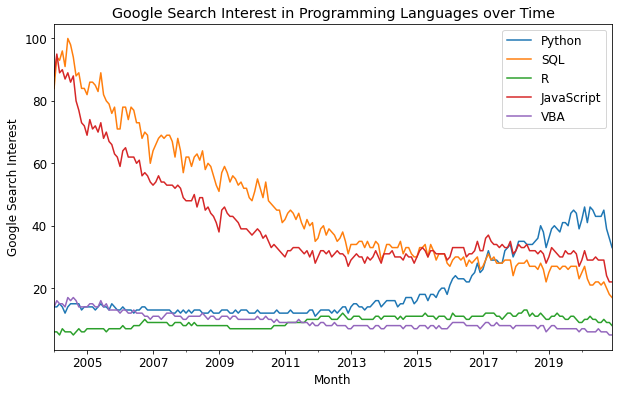

Smooth out the lines using rolling average or resample:

<AxesSubplot:title={'center':'Rolling Mean of Google Trends Over Time'}, xlabel='Month'>

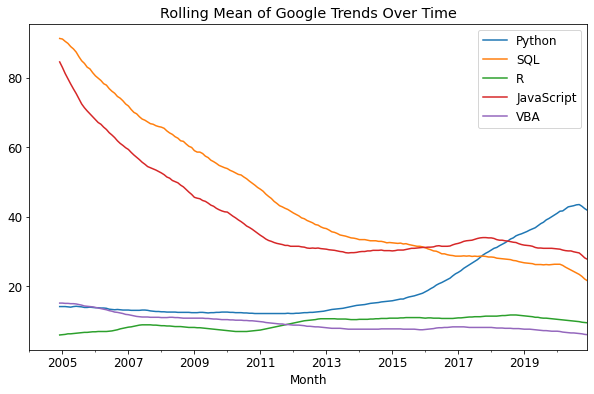

In [83]:
(
    trends_cleaned
    .rolling(window=12)
    .mean()
)

Let's start looking at the percentage change in search interest over time...

Remember our pct_change_all data from earlier?

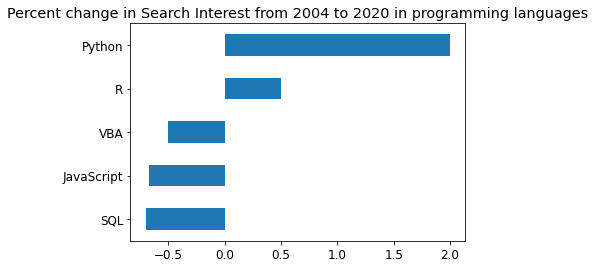

In [87]:
# plot the data on the axes: ax
(
    pct_change_all
    .plot(kind='barh',
          title='Percent change in Search Interest from 2004 to 2020 in programming languages')
)

We can use the method `.pct_change()` to look at the percentage change from *n* observations ago. Since every observation is a month let's use the parameter `periods=12` to look at the change each month from the year before.

Let's look at the *Annual Percent Change of Python Search Interest for Each Month*.

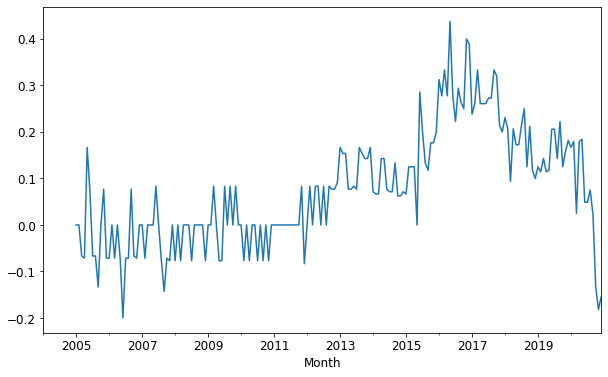

In [91]:
(
    trends_cleaned
    .pct_change(12)
    ['Python']
    .plot(figsize=(10,6))
)

That's a bit hard to read, and comparing with other languages will be very difficult on one plot. Let's use subplots (and a little bit of coloring magic) to compare.

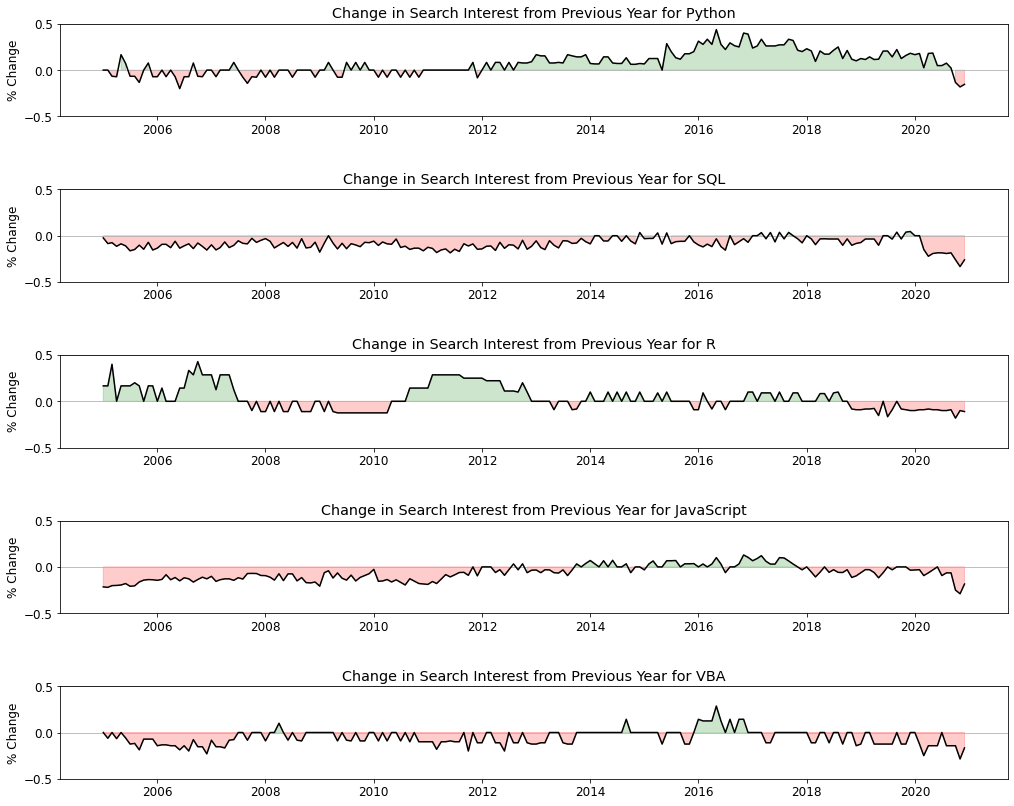

In [92]:
# look at the percentage increase in each month from 12 months ago (previous year)
trends_pct_change = trends_cleaned.pct_change(12)

# set up 5 vertical subplots
fig, axs = plt.subplots(5, figsize=(15,12))

# loop over each subplot & each column
for ax, col in zip(axs, trends_pct_change.columns):
    # plot the percentage change for each language
    ax.plot(trends_pct_change.index, trends_pct_change[col],  color='k') 
    
    # fill the space between the line and zero with GREEN if positive and RED if negative.
    ax.fill_between(trends_pct_change.index, trends_pct_change[col], where=trends_pct_change[col]<=0, color='r', alpha=0.2)
    ax.fill_between(trends_pct_change.index, trends_pct_change[col], where=trends_pct_change[col]>=0, color='g', alpha=0.2)
    
    # set y-axis and title
    ax.set_ylim([-0.5,0.5])
    ax.yaxis.grid()
    ax.set_ylabel('% Change')
    ax.set_title(f"Change in Search Interest from Previous Year for {col}")
    
plt.tight_layout(pad=3.0)

Let's have a look at the average percent change year on year:

<AxesSubplot:xlabel='Month'>

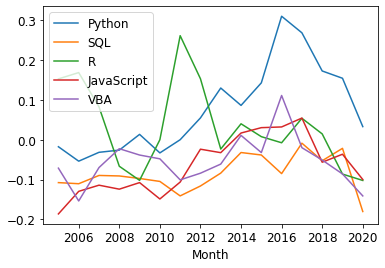

In [99]:
yearly_trends = (
    trends_cleaned
    .groupby(trends_cleaned.index.year)
    .mean()
    .pct_change()
)
yearly_trends

,Python,SQL,R,JavaScript,VBA
Month,,,,,
2004,NaN,NaN,NaN,NaN,NaN
2005,-0.017647,-0.107763,0.152778,-0.186391,-0.071429
2006,-0.053892,-0.110542,0.168675,-0.129697,-0.153846
2007,-0.031646,-0.089758,0.082474,-0.114206,-0.069930
2008,-0.026144,-0.091024,-0.066667,-0.124214,-0.022556
2009,0.013423,-0.097357,-0.102041,-0.107720,-0.038462
2010,-0.033113,-0.104777,0.000000,-0.148893,-0.048000
2011,0.000000,-0.141136,0.261364,-0.106383,-0.100840
2012,0.054795,-0.116232,0.153153,-0.023810,-0.084112


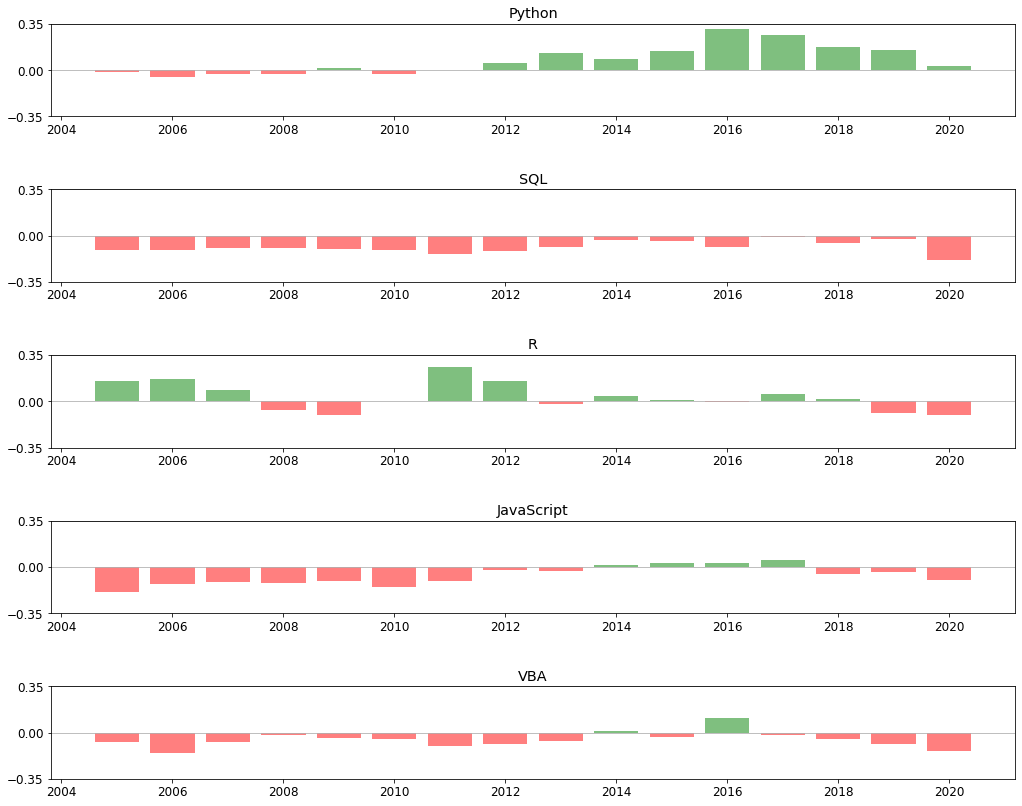

In [100]:
import numpy as np

# set up 5 vertical sublots
fig, axs = plt.subplots(5, figsize=(15,12))

# loop through each column to plot on each subplot
for ax, col in zip(axs, yearly_trends.columns):

    # bar plot using color map for pos/neg values
    ax.bar(
           yearly_trends.index, 
           yearly_trends[col], 
           color=(yearly_trends[col] >= 0).map({True: 'g', False: 'r'}), alpha=0.5
          )
    
    # set labels
    ax.set_title(f"{col}")
    ax.yaxis.grid(which='major')
    ax.set_ylim([-0.35, 0.35])
    major_ticks = np.arange(-0.35,0.36,0.35)
    ax.set_yticks(major_ticks)
    
plt.tight_layout(pad=3.0)

<img src='images/panda.gif' width='300px' align='right' style="padding: 20px">

## Final thoughts...

Learning Pandas can be quite frustrating but with practice (and Google!) it becomes straightforward and extremely powerful.

**Want to learn more? Join us on a public course:**
- [Python for Data Analysts](https://godatadriven.com/training/python-for-data-analysts-training/)
- [Certified Python for Data Science](https://godatadriven.com/training/data-science-python-foundation-training/)
- [And more!](https://godatadriven.com/what-we-do/train/#upcoming)

Interested in our other courses? Download our [Training Guide](https://godatadriven.com/topic/training-brochure/)

---
<img src='images/download.png' width='80px' align='left'>

**If you would like to <mark>save this notebook</mark> there is a Download button at the top of the page. This will download the `.ipynb`**

If you are not planning to get Anaconda but you want to save the work you've done, got to `File -> Download as` and choose `.html`.

<img src='images/visit-repo.png' width='60px' align='left'>

Alternatively you can click Visit repo at the top to navigate to the github repo where you can download everything as a `.zip` file. 


Full solutions can be found in the [solutions folder](solutions/).